# Title

**Exercise: Regression with Boosting**

# Description

The goal of this exercise is to understand Gradient Boosting Regression by doing!

<img src="../img/image.png" style="width: 500px;">



# Instructions:

## Part A: 
- Read the dataset airquality.csv as a pandas dataframe.
- Take a quick look at the dataset.
- Assign the predictor and response variables appropriately as mentioned in the scaffold.
- Fit a single decision tree stump and predict on the entire data.
- Calculate the residuals and fit another tree on the residuals.
- Take a combination of the trees and fit on the model.
- For each of these model use the helper code provided to plot the model prediction and data.

## Part B: Compare to bagging 
- Split the data into train and test splits.
- Specify the number of bootstraps for bagging to be 30 and a maximum depth of 3.
- Define a Gradient Boosting Regression model that uses with 5000 estimators and depth of 1.
- Define a Bagging Regression model that uses the Decision Tree as its base estimator.
- Fit both the models on the train data.
- Use the helper code to predict using the mean model and individual estimators. The plot will look similar to the one given above.
- Compute the MSE of the 2 models on the test data.

# Hints:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">sklearn.train_test_split()</a> : Split arrays or matrices into om train and test subsets.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html" target="_blank">BaggingRegressor()</a> : Returns a Bagging regressor instance.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html" target="_blank">DecisionTreeRegressor()</a> : A decision tree regressor.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html" target="_blank">sklearn.mean_squared_error()</a> : Mean squared error regression loss.

<a href="https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html" target="_blank">GradientBoostingRegressor()</a> : Gradient Boosting for regression.

Note: This exercise is **auto-graded and you can try multiple attempts.**

In [1]:
# Import necessary libraries

# Evaluate bagging ensemble for regression
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import pandas as pd 
import itertools
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Read the dataset airquality.csv
df = pd.read_csv("airquality.csv")

In [3]:
# Take a quick look at the data
# Remove rows with missing values
df = df[df.Ozone.notna()]
df.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
5,6,28.0,NaN,14.9,66,5,6


In [4]:
# Assign "x" column as the predictor variable and "y" as the
# We only use Ozone as a predictor for this exercise and Temp as the response

x,y = df['Ozone'].values,df['Temp'].values

# Fancy way of sorting on X 
# We do this now because we will not split the data 
# into train/val/test in this part of the exercise

x,y = list(zip(*sorted(zip(x,y))))
x,y = np.array(x).reshape(-1,1),np.array(y)

## Part A: Gradient Boosting by hand

In [5]:
# Fit a single decision tree stump on the entire data

basemodel = DecisionTreeRegressor(max_depth=1)
basemodel.fit(x,y)

# Predict on the entire data
y_pred = basemodel.predict(x)

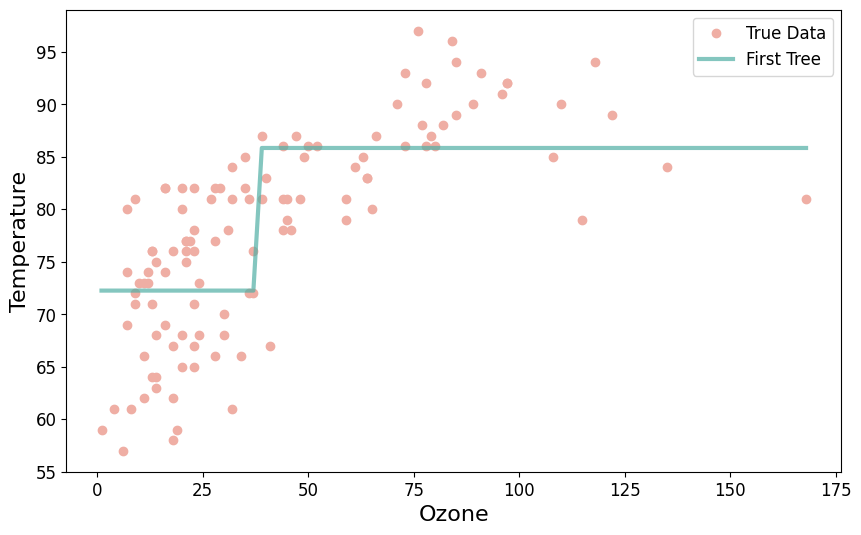

In [6]:
# Helper code to plot the data

plt.figure(figsize=(10,6))
xrange = np.linspace(x.min(),x.max(),100)
plt.plot(x,y,'o',color='#EFAEA4', markersize=6, label="True Data")
plt.xlim()
plt.plot(x,y_pred,alpha=0.7,linewidth=3,color='#50AEA4', label='First Tree')
plt.xlabel("Ozone", fontsize=16)
plt.ylabel("Temperature", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.show()

In [7]:
### edTest(test_first_residuals) ###

# Calculate the Error Residuals
residuals = y - y_pred

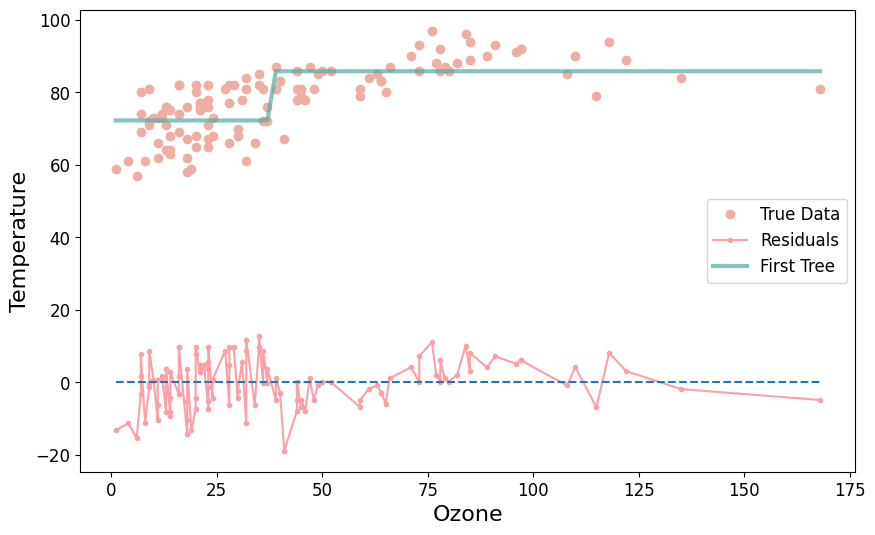

In [8]:
# Helper code to plot the data with the residuals
plt.figure(figsize=(10,6))

plt.plot(x,y,'o',color='#EFAEA4', markersize=6, label="True Data")
plt.plot(x,residuals,'.-',color='#faa0a6', markersize=6, label="Residuals")
plt.plot([x.min(),x.max()],[0,0],'--')
plt.xlim()
plt.plot(x,y_pred,alpha=0.7,linewidth=3,color='#50AEA4', label='First Tree')
plt.xlabel("Ozone", fontsize=16)
plt.ylabel("Temperature", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='center right',fontsize=12)
plt.show()

In [9]:
### edTest(test_fitted_residuals) ###

# Fit another tree stump on the residuals
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(x,residuals)

# Predict on the entire data
y_pred_residuals = dtr.predict(x)

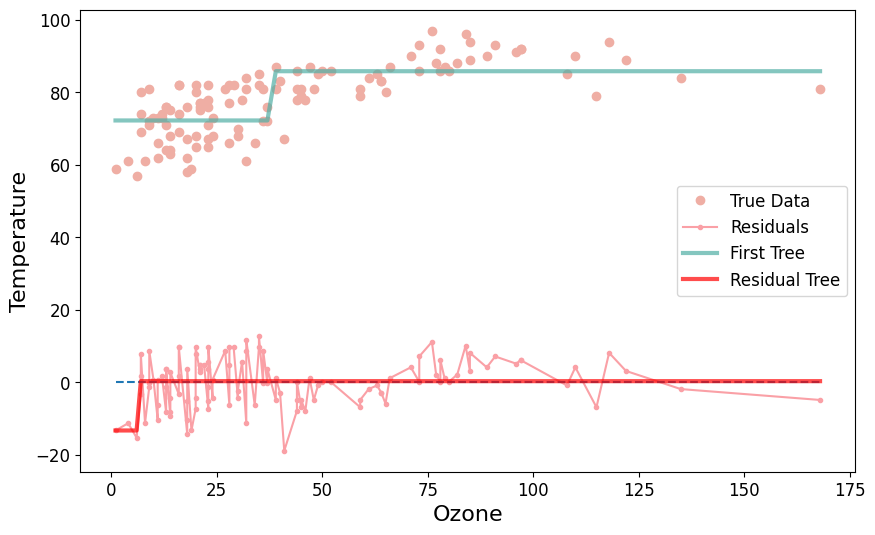

In [10]:
# Helper code to add the fit of the residuals to the original plot 
plt.figure(figsize=(10,6))

plt.plot(x,y,'o',color='#EFAEA4', markersize=6, label="True Data")
plt.plot(x,residuals,'.-',color='#faa0a6', markersize=6, label="Residuals")
plt.plot([x.min(),x.max()],[0,0],'--')
plt.xlim()
plt.plot(x,y_pred,alpha=0.7,linewidth=3,color='#50AEA4', label='First Tree')
plt.plot(x,y_pred_residuals,alpha=0.7,linewidth=3,color='red', label='Residual Tree')
plt.xlabel("Ozone", fontsize=16)
plt.ylabel("Temperature", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='center right',fontsize=12)
plt.show()

In [11]:
### edTest(test_new_pred) ###

# Set a lambda value and compute the predictions based on the residuals
lambda_ = 0.1
y_pred_new = y_pred + lambda_ * y_pred_residuals

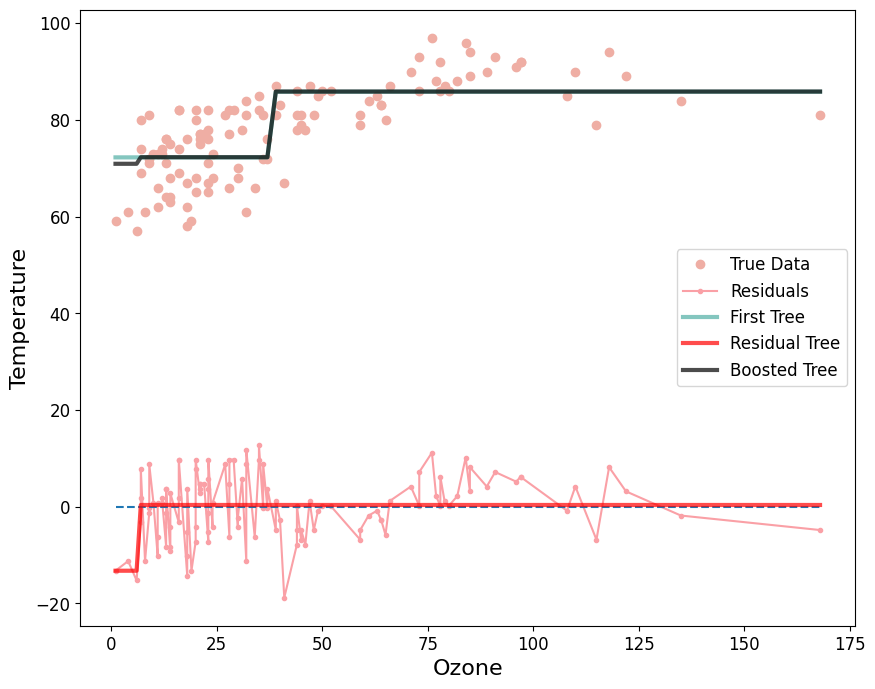

In [12]:
# Helper code to plot the boosted tree
plt.figure(figsize=(10,8))

plt.plot(x,y,'o',color='#EFAEA4', markersize=6, label="True Data")
plt.plot(x,residuals,'.-',color='#faa0a6', markersize=6, label="Residuals")
plt.plot([x.min(),x.max()],[0,0],'--')
plt.xlim()
plt.plot(x,y_pred,alpha=0.7,linewidth=3,color='#50AEA4', label='First Tree')
plt.plot(x,y_pred_residuals,alpha=0.7,linewidth=3,color='red', label='Residual Tree')
plt.plot(x,y_pred_new,alpha=0.7,linewidth=3,color='k', label='Boosted Tree')
plt.xlabel("Ozone", fontsize=16)
plt.ylabel("Temperature", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='center right',fontsize=12)
plt.show()

### Mindchow 🍲 
You can continue doing this! Try at least one more interation. 

# Part 2: Comparison with Bagging

To compare the two methods, we will be using sklearn's methods and not our own implementation from above. 

In [13]:
# Split the data into train and test sets with train size as 0.8 
# and random_state as 102
# The default value for shuffle is True for train_test_split, so the ordering we 
# did above is not a problem. 

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=102)

In [14]:
### edTest(test_boosting) ###

# Set a learning rate
l_rate = 0.1

# Initialise a Boosting model using sklearn's boosting model 
# Use 5000 estimators, depth of 1 and learning rate as defined above
boosted_model  = GradientBoostingRegressor(n_estimators=5000, max_depth=1, learning_rate=l_rate)

# Fit on the train data
boosted_model.fit(x_train,y_train)

# Predict on the test data
y_pred = boosted_model.predict(x_test)

In [15]:
# Train a bagging model
# Specify the number of bootstraps
num_bootstraps = 30

# Specify the maximum depth of the decision tree
max_depth = 100

# Define the Bagging Regressor Model
# Use Decision Tree as your base estimator with depth as mentioned in max_depth
# Initialise number of estimators using the num_bootstraps value
# Set max_samples as 0.8 and random_state as 3
bagging_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=max_depth), n_estimators=num_bootstraps, max_samples=0.8, random_state=3)
                        

# Fit the model on the train data
bagging_model.fit(x_train,y_train)

# Predict on the test data
y_pred_bagging = bagging_model.predict(x_test)



d:\app\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


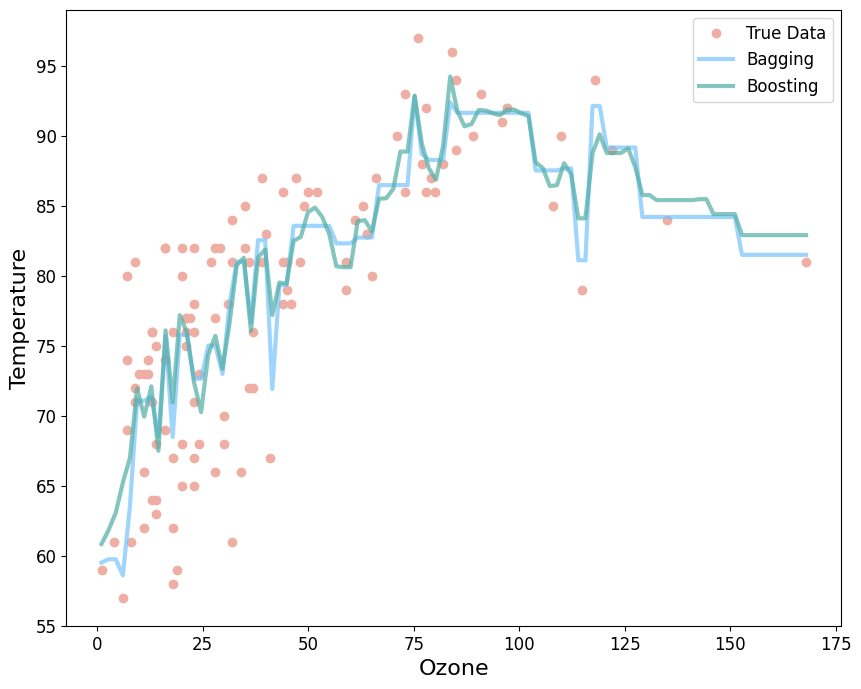

In [16]:
# Helper code to plot the bagging and boosting model predictions
plt.figure(figsize=(10,8))

xrange = np.linspace(x.min(),x.max(),100).reshape(-1,1)
y_pred_boost = boosted_model.predict(xrange)
y_pred_bag = bagging_model.predict(xrange)
plt.plot(x,y,'o',color='#EFAEA4', markersize=6, label="True Data")
plt.xlim()
plt.plot(xrange,y_pred_boost,alpha=0.7,linewidth=3,color='#77c2fc', label='Bagging')
plt.plot(xrange,y_pred_bag,alpha=0.7,linewidth=3,color='#50AEA4', label='Boosting')
plt.xlabel("Ozone", fontsize=16)
plt.ylabel("Temperature", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.show()

In [17]:
### edTest(test_mse) ###

# Compute the MSE of the Boosting model prediction on the test data

boost_mse = mean_squared_error(y_test, y_pred)
print("The MSE of the Boosting model is", boost_mse)

The MSE of the Boosting model is 52.66316316363966


In [18]:
# Compute the MSE of the Bagging model prediction on the test data

bag_mse = mean_squared_error(y_test, y_pred_bagging)
print("The MSE of the Bagging model is", bag_mse)

The MSE of the Bagging model is 55.01029065728144


## Mindchow 🍲

To be fair, we should fine tune the hyper-parameters for both models. 

Go back and play with the `learning rate`,`n_estimators` and `max_depth` for Boosting and `n_estimators` and `max_depth` for Bagging. 

How does RF compare? 
 




*Your answer here*